In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#fonte dos dados: https://www.esportsearnings.com/
times = pd.read_csv('highest_earning_teams.csv')

In [3]:
#times da mesma empresa mas jogos diferentes possuem o mesmo código de time
times

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


# Estatística Descritiva

### Relação entre os jogos e a quantidade de times:

<Figure size 800x600 with 0 Axes>

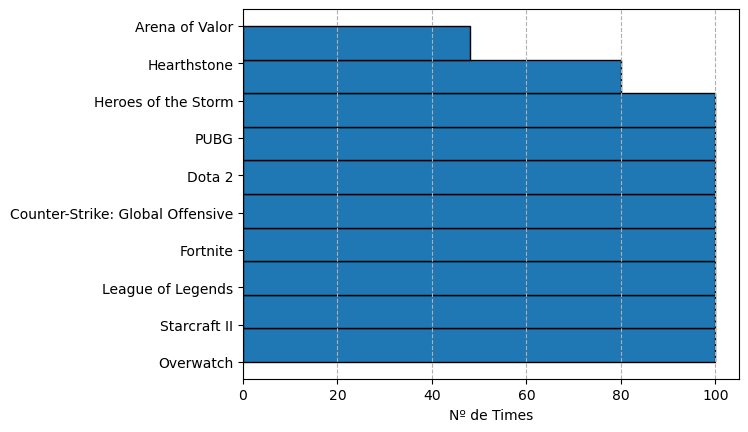

<Figure size 800x600 with 0 Axes>

In [4]:
plt.hist(times['Game'], bins=10, orientation='horizontal', edgecolor='black')
plt.grid(axis='x', linestyle='--')
plt.xlabel('Nº de Times')
plt.figure(figsize=(8,6))

### Dinheiro movimentado por cada jogo

In [5]:
jogos = times['Game'].unique().tolist()

In [6]:
#criar uma lista que represente o total gerado por cada jogo
usd_jogos = []

for i in range(len(jogos)):
    total = sum(times.loc[times['Game'] == jogos[i], 'TotalUSDPrize'].tolist())
    usd_jogos.append(round(total, 2))

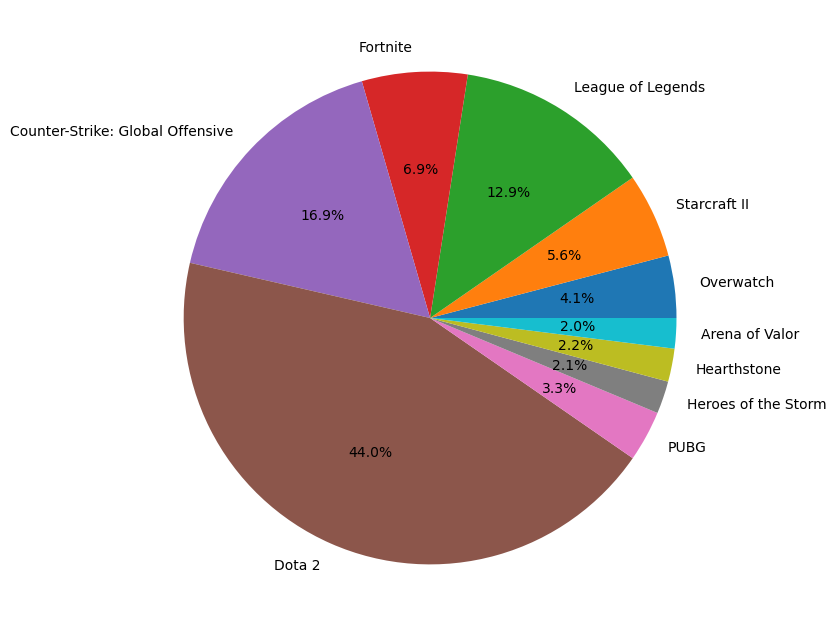

In [7]:
plt.figure(figsize=(10, 8))
plt.pie(usd_jogos, labels=jogos, autopct="%1.1f%%")
plt.show()

In [ ]:
print('Valor movimentado por cada jogo desde seu ínicio nos e-sports:\n')
dic = dict(zip(jogos, usd_jogos))
for i in range(len(jogos)):
    print(jogos[i], 'movimentou U$D', round(usd_jogos[i], 2), '\n')

In [58]:
df = pd.DataFrame(index=jogos, data=usd_jogos, columns=['usd'])
df

,usd
Overwatch,2.046527e+07
Starcraft II,2.785615e+07
League of Legends,6.466556e+07
Fortnite,3.466133e+07
Counter-Strike: Global Offensive,8.485393e+07
Dota 2,2.202828e+08
PUBG,1.671500e+07
Heroes of the Storm,1.071052e+07
Hearthstone,1.086453e+07
Arena of Valor,9.969149e+06


In [59]:
# Supondo que você tenha o DataFrame criado e a coluna "usd" contenha valores numéricos

# Cria uma nova coluna temporária "usd_formatada" com a formatação desejada
teste = df['usd'].apply('{:,.2f}'.format)
df['usd'] = teste

In [60]:
df

,usd
Overwatch,"20,465,267.66"
Starcraft II,"27,856,145.24"
League of Legends,"64,665,560.92"
Fortnite,"34,661,332.81"
Counter-Strike: Global Offensive,"84,853,934.16"
Dota 2,"220,282,764.57"
PUBG,"16,715,000.28"
Heroes of the Storm,"10,710,522.66"
Hearthstone,"10,864,526.98"
Arena of Valor,"9,969,148.62"


### Relação entre torneios jogados e USD conquistados (para times de Overwatch):

([<matplotlib.axis.YTick at 0x1aca9fcfcd0>,
 [Text(0, 0, 'U$D 00.00'),
  Text(0, 1000000, 'U$D 1,000,000.00'),
  Text(0, 2000000, 'U$D 2,000,000.00'),
  Text(0, 3000000, 'U$D 3,000,000.00')])

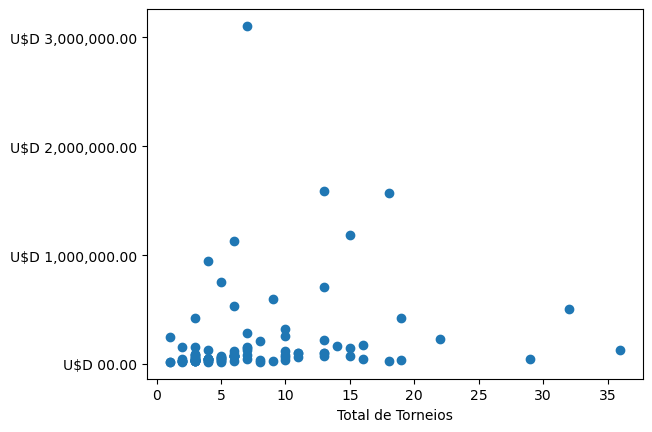

In [61]:
overwatch = times.loc[times['Game'] == 'Overwatch']

plt.scatter(x = overwatch['TotalTournaments'], y = overwatch['TotalUSDPrize']) #marker = '*'
plt.xlabel('Total de Torneios')

yticks_positions = [0, 1000000, 2000000, 3000000]
yticks_labels = ["U$D 00.00", "U$D 1,000,000.00", "U$D 2,000,000.00", "U$D 3,000,000.00"]
plt.yticks(yticks_positions, yticks_labels)

podemos notar que participar de muitos torneios não implica em ter uma grande quantidade de USD conquistados

### Dinheiro movimentado por gênero de jogos:

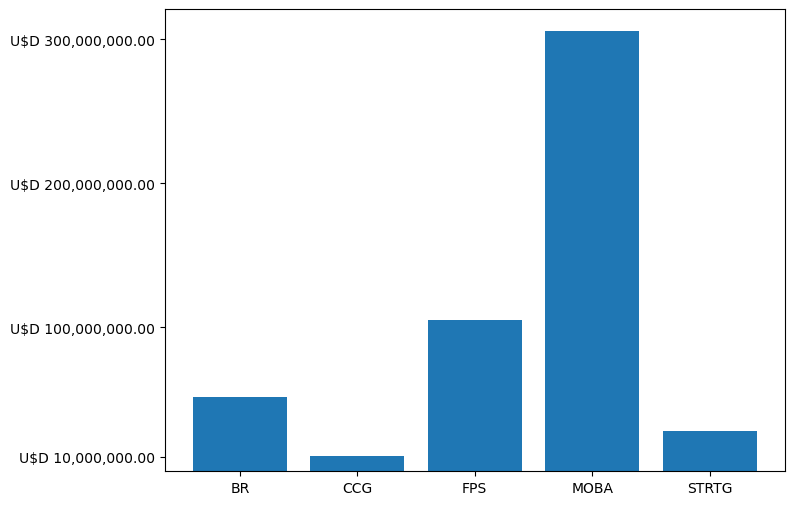

In [63]:
usd_por_genero = times.groupby(['Genre'])['TotalUSDPrize'].sum().tolist()
generosID = ['BR', 'CCG', 'FPS', 'MOBA', 'STRTG']

plt.figure(figsize=(8,6))

plt.bar(generosID, usd_por_genero)

yticks_positions = [10000000,100000000,200000000,300000000]
yticks_labels = ["U$D 10,000,000.00","U$D 100,000,000.00" ,"U$D 200,000,000.00","U$D 300,000,000.00" ]


plt.yticks(yticks_positions, yticks_labels)
plt.show()

# Informação Geográfica

### Top 10 times de Overwatch que mais participaram de torneios e seus respectivos países:

In [64]:
top30 = overwatch['TotalUSDPrize'].nlargest(30)
top30_times = []

for i in range(len(top30)):
    df_aux = overwatch.loc[overwatch['TotalUSDPrize'] == top30[i]]
    top30_times.append( df_aux['TeamName'].iloc[0] )

In [65]:
#criado no excel
paises = pd.read_csv('times_paises.csv')
paises.shape

(30, 2)

In [66]:
paises.head()

,times,país
0,San Francisco Shock,Estados Unidos
1,London Spitfire,Reino Unido
2,New York Excelsior,Estados Unidos
3,Philadelphia Fusion,Estados Unidos
4,Seoul Dynasty,Coreia do Sul


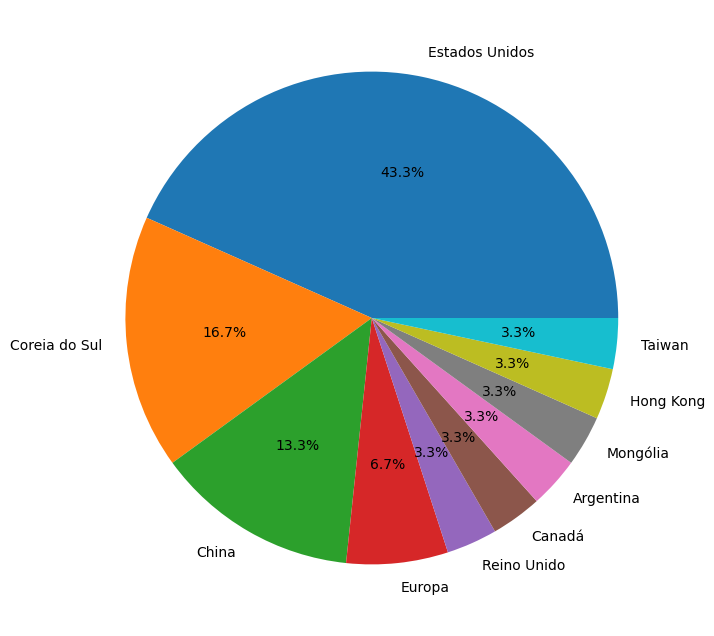

In [67]:
agrupado = paises['país'].value_counts()
numeros = agrupado.tolist()
nomes = agrupado.index.tolist()

plt.figure(figsize=(10, 8))
plt.pie(numeros, labels=nomes, autopct="%1.1f%%")
plt.show()